# Database Query and Heatmap (V2)

Library Initialization

In [267]:
from Modules.database_gen_sqlite import gen_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

Database Generation Parameters

In [268]:
wall_width, wall_height = 72, 120
num_studs = 40
base_name = "test1"

Simulation Parameters

In [269]:
stud_probability = 0.25
base_stud_prob = 0.5
stud_type_length = 4

Generate Database

In [270]:
database_path = gen_data(base_name, wall_width, wall_height, num_studs, True)

Extract Data from database

In [271]:
# Connects to the database
con = sqlite3.connect(database_path)
cur = con.cursor()

In [272]:
# Query entire data in table
cur.execute("SELECT * from stud_locations")
data = cur.fetchall()

Save data into array

In [273]:
stud_array = np.zeros([wall_height+1, wall_width+1], dtype=float)
stud_array.shape

(121, 73)

In [274]:
# Save coordinates to numpy array
for coord in data:
    
   x_coord, y_coord = coord[0], coord[1]
   
   # Check of overlapping studs
   if(stud_array[x_coord, y_coord] > 0):
      if(stud_array[x_coord, y_coord] < 1):
         stud_array[:, y_coord] = (stud_array[x_coord, y_coord] * stud_probability) + stud_array[x_coord,y_coord]
      
   stud_array[:, y_coord] = base_stud_prob

   # Expand the 4 coordinates by (x+1,y) of 3 iterations (2x4 stud dimension)
   for y in range(1,stud_type_length,1):
      if(x_coord+y < (wall_width+1)):
         
         if(stud_array[x_coord, y_coord+y] < 1 and stud_array[x_coord, y_coord+y] > 0):
               stud_array[:, y_coord+y] = (stud_array[x_coord,y_coord+y] * stud_probability) + stud_array[x_coord,y_coord+y]
               continue

         stud_array[:, y_coord+y] = base_stud_prob

IndexError: index 73 is out of bounds for axis 1 with size 73

Stud Data Refinement

In [ ]:
stud_array[stud_array > 1] = 1
df = pd.DataFrame(stud_array)
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.625,0.78125,0.78125,...,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0
1,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.625,0.78125,0.78125,...,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0
2,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.625,0.78125,0.78125,...,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0
3,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.625,0.78125,0.78125,...,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0
4,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.625,0.78125,0.78125,...,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.625,0.78125,0.78125,...,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0
69,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.625,0.78125,0.78125,...,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0
70,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.625,0.78125,0.78125,...,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0
71,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.625,0.78125,0.78125,...,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0


Display Heatmap

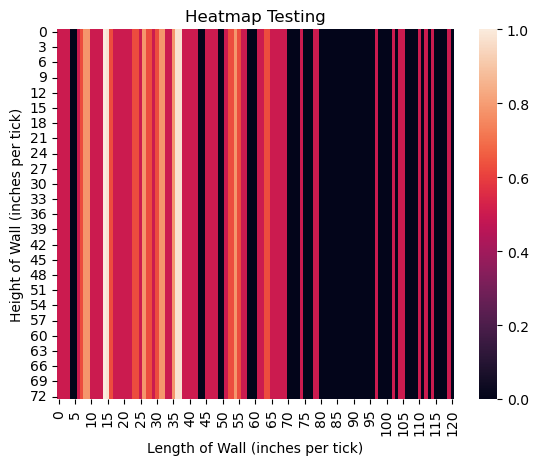

In [ ]:
heat = sns.heatmap(df, vmax=1)
heat.axes.set_xlabel("Length of Wall (inches per tick)")
heat.axes.set_ylabel("Height of Wall (inches per tick)")
heat.axes.set_title("Heatmap Testing")
plt.show()